(5 баллов) Используя подход box-jenkins постройте модель ARIMA
(statsmodels.tsa.arima_model) для временного ряда dow_jones_0.
Сделайте прогноз на 30 точек вперед. Интерпретируйте полученный
результат.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa import arima_model
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from load_dataset import Dataset
import plotting

In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
dataset = Dataset('../data/Dataset')

In [6]:
ts = dataset['dow_jones_0.csv']
# ts.index = ts.index.map(pd.to_datetime)

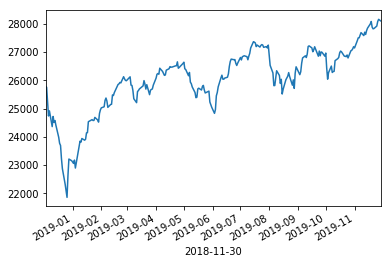

In [7]:
ts.plot()

#### 1. Box-Jenkins approach
1. Убрать гетероскедастичность при помощи логарифмирования.
2. Продифференцировать разными способами и узнать нужный порядок дифференцирования d, D, анализируя
   получившийся ряд при помощи графика acf_plot.
3. Оценить параметры (q, Q), (p, P) по графикам acf, pacf продифференцированного ряда.
4. Обучить модель ARIMA и попробовать сделать предсказания исходного ряда.
5. Критерий хорошей модели - около-стационарные остатки.

In [8]:
ts, ts_test = ts[:220], ts[220:]

In [9]:
ts_log = np.log(ts)

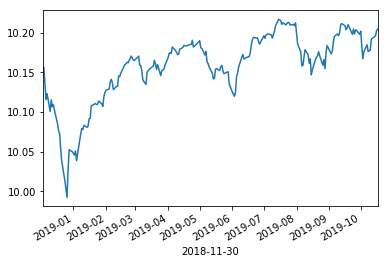

In [10]:
ts_log.plot()

#### Была попытка попробовать сделать преобразование Бокса-Кокса, но особенно не помогло поэтому этот кусок можно не использовать

In [11]:
# ts_box_cox, lmbda = boxcox(ts, lmbda=None)

In [12]:
# ts_box_cox = pd.Series(ts_box_cox, index=ts.index)

In [13]:
# ts_box_cox.plot()

#### Собственно Box-Jenkins approach

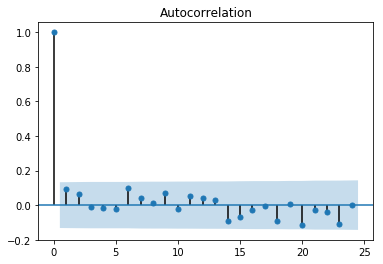

In [14]:
plot_acf(ts_log.diff(1).dropna());
# q = (0)

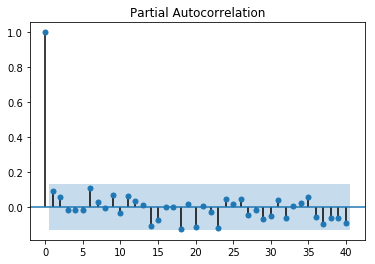

In [15]:
plot_pacf(ts_log.diff(1).dropna(), lags=40);
# p = 0

In [16]:
pdq = (0, 1, 0)
model = arima_model.ARIMA(ts_log, order=pdq)

C:\Users\бббюбб\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\бббюбб\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: A date index has been provid

In [17]:
res = model.fit()

In [18]:
preds = res.forecast(len(ts_test))

In [19]:
# preds = inv_boxcox(preds[0], lmbda)
# preds = pd.Series(preds, index=ts_test.index)
# plotting.plot_ts(ts, preds, ts_test)

In [20]:
preds = pd.Series(preds[0], index=ts_test.index)

In [21]:
plotting.plot_ts(ts, np.exp(preds), ts_test)

Loading BokehJS ...

In [22]:
res = np.exp(preds) - ts_test

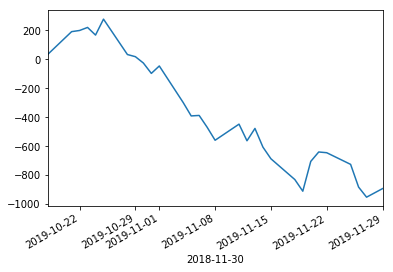

In [23]:
res.plot()

Случайное блуждание, насколько я понимаю ARIMA смогла примерно уловить тренд, но не больше..Ошибка растет по удалению вглубь OOT-выборки